In [17]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#%matplotlib inline

In [18]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [19]:
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01    313.425000
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
1960-04-01    319.120000
1960-05-01    319.925000
1960-06-01    319.450000
1960-07-01    318.060000
1960-08-01    315.775000
                 ...    
1999-07-01    369.000000
1999-08-01    366.700000
1999-09-01    364.675000
1999-10-01    365.140000
1999-11-01    366.650000
1999-12-01    367.900000
2000-01-01    369.020000
2000-02-01    369.375000
2000-03-01    370.400000


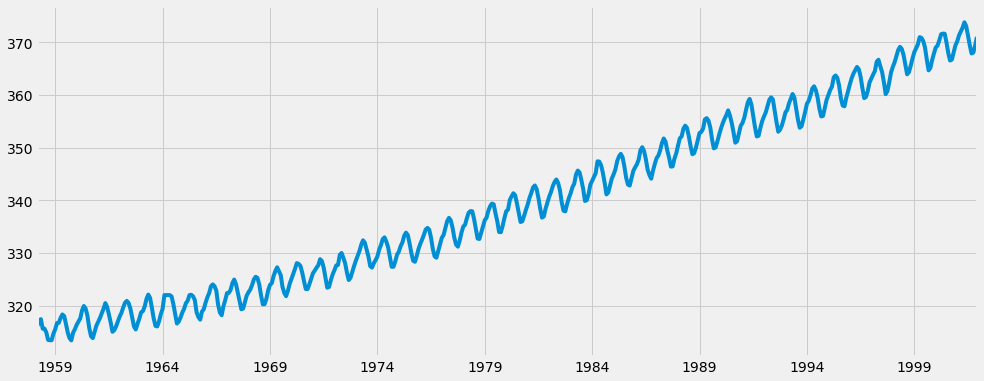

In [20]:
y.plot(figsize=(15, 6))
plt.show()

In [21]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [7]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

    

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624045514
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.711172763955
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320035
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878469210077
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978073326
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912932532
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.04875557057
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327717368
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.194106703013
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716886296
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1087.8576514316778
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:897.5235048599845
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.595789359847
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912987788602
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194082
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.79385496104305
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.9501759055303
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:376.92837609132766
AR

In [22]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                co2   No. Observations:                  526
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -133.890
Date:                            Thu, 05 Apr 2018   AIC                            277.780
Time:                                    21:34:29   BIC                            299.107
Sample:                                03-01-1958   HQIC                           286.130
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3181   2.57e+04   1.24e-05      1.000   -5.04e+04    5.04e+04
ma.L1         -0.6254   3.68e-06   

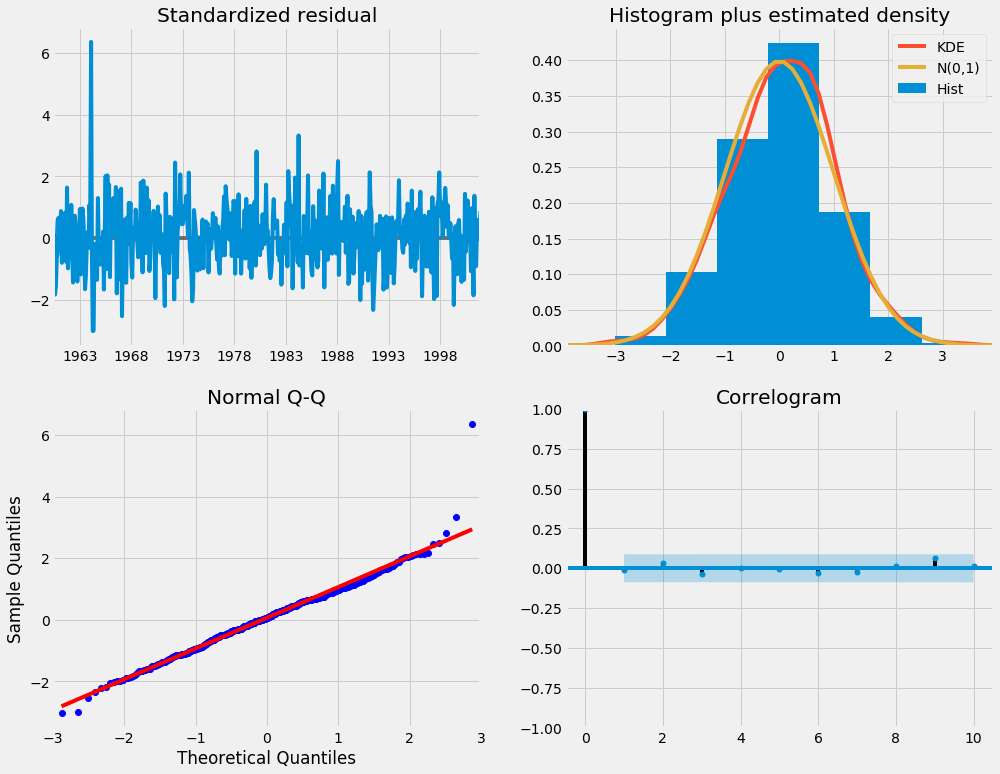

In [23]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [25]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

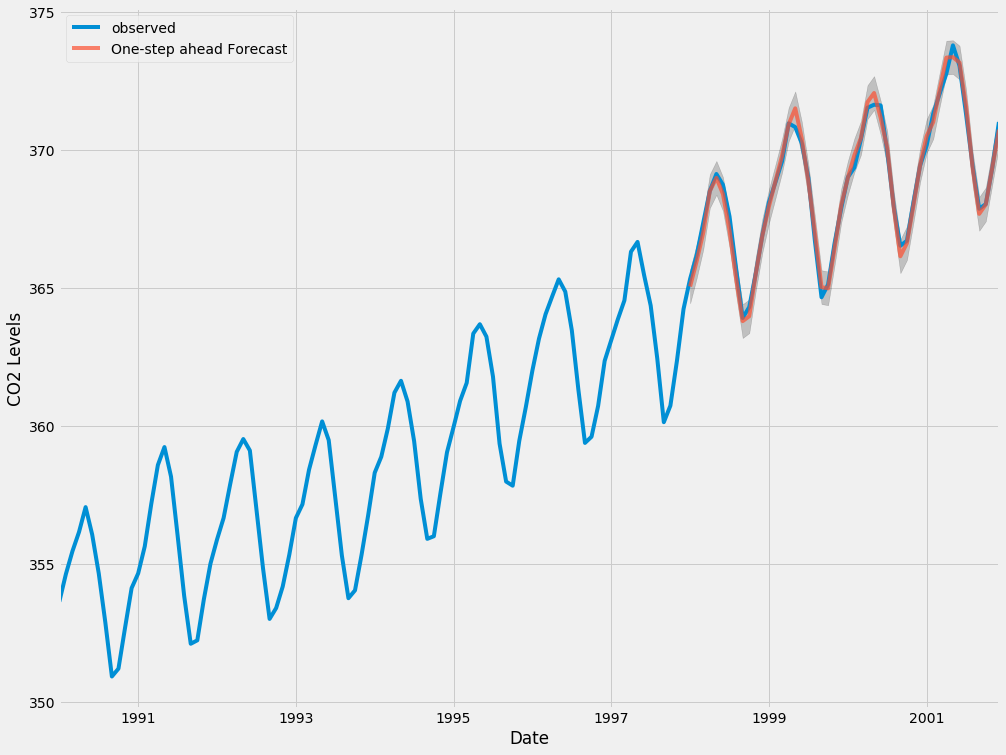

In [28]:
ax = y['1990':].plot(label='observed', figsize=(15,12))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [16]:
help(sm.tsa.statespace.SARIMAX)

Help on class SARIMAX in module statsmodels.tsa.statespace.sarimax:

class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
 |  Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
 |  model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The observed time-series process :math:`y`
 |  exog : array_like, optional
 |      Array of exogenous regressors, shaped nobs x k.
 |  order : iterable or iterable of iterables, optional
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters. `d` must be an integer
 |      indicating the integration order of the process, while
 |      `p` and `q` may either be an integers indicating the AR and MA
 |      orders (so that all lags up to those orders are included) or else
 |      iterables giving specific AR and / or MA lags to include. Default is
 |      an AR(1) model: (1,0,0).
 |  seasonal_order : iterable, optional
 |      The (P,D,Q,s) order of the 